In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *

df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
df.columns.tolist()

['airline_sentiment',
 'is_reply',
 'reply_count',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [49]:
# Force datatime on the `tweet_created` column
df.tweet_created = pd.to_datetime(df.tweet_created)

all_timestamps = list(df.tweet_created.values)
Tempsfinal = max(all_timestamps)   
Tempsinitial = min(all_timestamps)
Interval = (Tempsfinal-Tempsinitial).astype('timedelta64[D]').astype(int)
print('Start time: ', Tempsinitial)
print('End time:   ', Tempsfinal)
print('Interval:   ', Interval)

# How many tweets do we have?
print("Number of tweets:", df.shape[0])

# Show first rows on dataframe
df.head(4)

Start time:  2017-10-25T10:00:48.000000000
End time:    2018-01-08T20:01:58.000000000
Interval:    75
Number of tweets: 7867


,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada)


In [50]:
print (df.shape)

(7867, 9)


In [51]:
df['airline_sentiment'].unique()
counts = df.groupby('airline_sentiment').size()

percentages = counts.values/np.sum(counts.values)*100.
print(percentages)

[ 48.1505021   32.4774374   19.37206051]


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


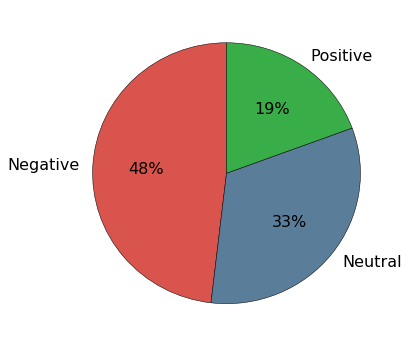

In [52]:
# Pie plot
rcParams['font.size'] = 16.0
matplotlib.rcParams['lines.linewidth'] = 7
matplotlib.rcParams['font.sans-serif'] = "League Gothic"
matplotlib.rcParams['font.family'] = "sans-serif"

p, tx, autotexts = plt.pie(percentages,labels=['Negative','Neutral','Positive'],
        colors=[sns.xkcd_rgb["pale red"],sns.xkcd_rgb["steel blue"], sns.xkcd_rgb["medium green"]],
        labeldistance=1.1,startangle=90,
        shadow=False,autopct='%.2f%%',
        wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True})
    
perp = ['48%','33%','19%']
for i, a in enumerate(autotexts):
    a.set_text("{}".format(perp[i]))
    
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('piechartALLlabels.jpg', bbox_inches='tight',dpi=400)

In [53]:
df['retweet_count'].unique()

array([0])

In [54]:
df['reply_count'].unique()

array([0])

In [55]:
df.drop(['retweet_count','reply_count'], axis=1)

,airline_sentiment,is_reply,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,
942743012337123328,positive,False,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin
926857871916183553,positive,True,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN
936979305720090626,neutral,True,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN
943983853802328064,negative,True,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada)
938207464457211904,negative,True,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada)
931526746301714435,neutral,True,"@Iberia hola, no conozco mi numéro IBERIA PLUS...",NaN,2017-11-17 14:17:37,NaN,NaN
933385784228532233,neutral,False,El canal Smithsonian reconstruye en video el a...,NaN,2017-11-22 17:24:47,NaN,NaN
932856751099142144,positive,False,"Con @Iberia, mi destino a un solo click. ¡Dese...",NaN,2017-11-21 06:22:35,NaN,NaN
927623530585509889,negative,True,@facua Pueden ayudarme con una maleta perdida ...,NaN,2017-11-06 19:47:38,NaN,NaN


In [56]:
mask = df['tweet_coord'].isnull()
print("Num of non Nan positions:",len(df.tweet_coord) - len(df.tweet_coord[mask])) 

Num of non Nan positions: 22


In [57]:
df['tweet_coord'].unique()

array([nan, '[43.248521, -2.947576]', '[28.4380525, -16.3998475]',
       '[41.30112848, 2.07474354]', '[40.47222222, -3.56083333]',
       '[43.42319443, -3.82403537]', '[42.88277778, -2.72444444]',
       '[41.30218123, 2.07590243]', '[-0.13555556, -78.36555556]',
       '[43.36, -5.845]', '[37.18861111, -3.77722222]',
       '[40.5, -3.66666667]', '[43.31001, -8.37273]',
       '[38.7167, -9.13333]', '[40.49483116, -3.56685028]',
       '[43.301111, -2.910556]', '[41.795636, 12.252037]',
       '[4.71920636, -74.06686107]', '[39.62861111, -8.66527778]',
       '[45.7, 9.6667]'], dtype=object)

In [58]:
# Force the index to be the creation date
df_by_date = df.set_index('tweet_created')
# Select only airline_sentiment
df_date_sent = df_by_date[['newairline_sentiment']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['newairline_sentiment'])
sent_onehot.head()

KeyError: "['newairline_sentiment'] not in index"

In [ ]:
time_histogram = sent_onehot.groupby(pd.TimeGrouper('D')).sum()

matplotlib.rcParams['lines.linewidth'] = 2
# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"],sns.xkcd_rgb["lightish blue"], sns.xkcd_rgb["medium green"]])
#ax.xticks(['2017-12-01','2017-12-30','2018-01-01','2018-01-30','2018-02-01'])
ax.set(xlabel='Date',ylabel='Number of tweets')

fig = plt.gcf()
fig.set_size_inches(10,6)
fig.savefig('TemporalEvolution2.jpg', bbox_inches='tight')

In [ ]:
df['is_reply'].unique()

In [ ]:
df.groupby('is_reply').size()

In [ ]:
# Select only is_reply
df_date_sent = df_by_date[['is_reply']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['is_reply'])
sent_onehot.head()

time_histogram = sent_onehot.groupby(pd.TimeGrouper('D')).sum()

import seaborn as sns
# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')